In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.utils import resample
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# URL to the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# Read data from the URL
df_data = pd.read_csv(url)
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data visualization

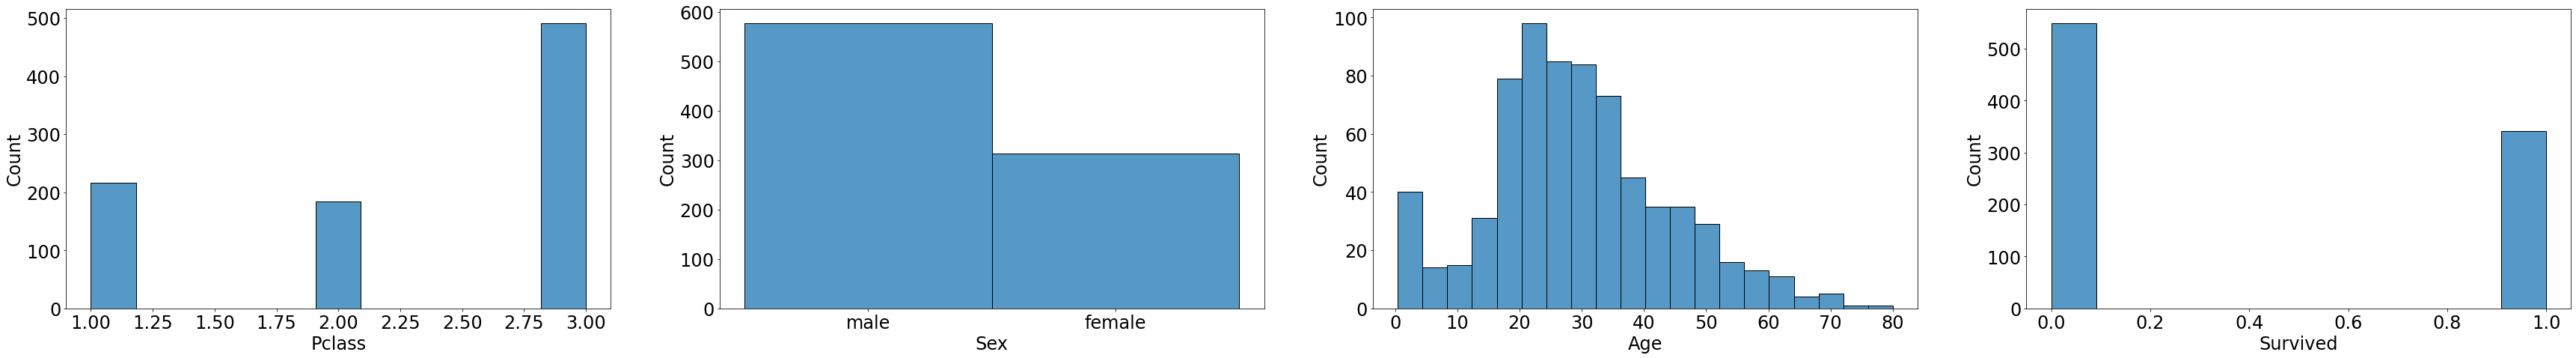

In [3]:
fig = plt.figure(figsize=(60, 25))
for i, key in enumerate(['Pclass', 'Sex', 'Age', 'Survived']):
    ax = fig.add_subplot(int(np.ceil(len(df_data.columns)/4)), 4, i+1)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    sns.histplot(data=df_data, x=key, ax=ax)
#     plt.ylabel('数')
plt.show()

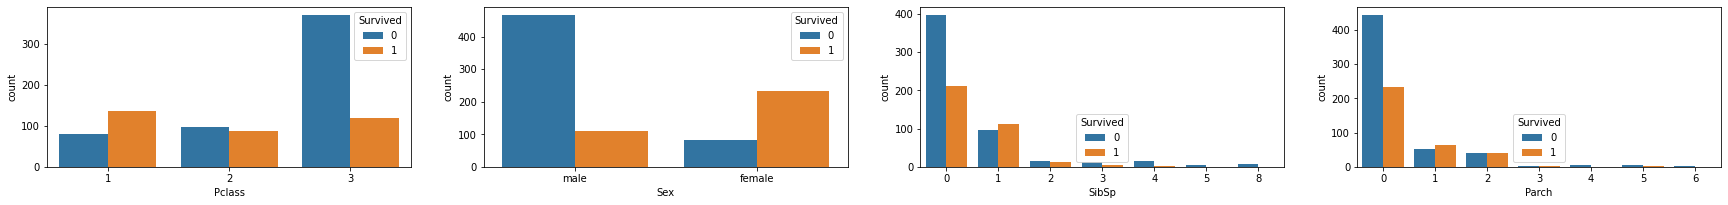

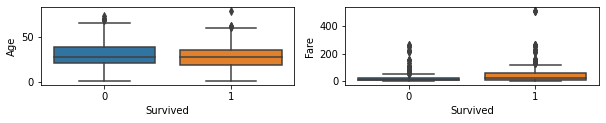

In [13]:
fig = plt.figure(figsize=(30, 10))
for i, key in enumerate(['Pclass', 'Sex', 'SibSp', 'Parch']):
    ax = fig.add_subplot(int(np.ceil(len(df_data.columns)/4)), 4, i+1)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(10)
    sns.countplot(data=df_data, x=key, hue='Survived', ax=ax)
plt.show()

fig = plt.figure(figsize=(10, 10))
for i, key in enumerate(['Age', 'Fare']):
    ax = fig.add_subplot(int(np.ceil(len(df_data.columns)/2)), 2, i+1)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(10)
    sns.boxplot(data=df_data, x='Survived', y=key, ax=ax)

# Create train/test dataset

In [18]:
df_train, df_test = train_test_split(df_data, test_size=0.2, random_state=42, stratify=df_data['Survived'])
df_train_survived = df_train.query('Survived==1')
df_train_not_survived = df_train.query('Survived==0')
if len(df_train_survived)>len(df_train_not_survived):
    df_train_not_survived = resample(df_train_not_survived, n_samples=len(df_train_survived), random_state=42)
elif len(df_train_survived)<len(df_train_not_survived):
    df_train_survived = resample(df_train_survived, n_samples=len(df_train_not_survived), random_state=42)
df_train_upsample = pd.concat([df_train_not_survived, df_train_survived]).sample(frac = 1)

print(df_train.shape, df_test.shape)

os.makedirs('../data/csv_data', exist_ok=True)
df_train.to_csv('../data/csv_data/train.csv')
df_test.to_csv('../data/csv_data/test.csv')
df_train_upsample.to_csv('../data/csv_data/train_upsample.csv')

# Experiment

In [4]:
def plot_cm(y_true, y_pred, title=''):
    classes = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot(cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Ground truth')
    plt.title(f'Confusion matrix {title}')
    plt.show()

## Experiment 1
### Using features ['Pclass', 'Sex', 'Age', 'Fare'], no upsample data

0.7999999999999999


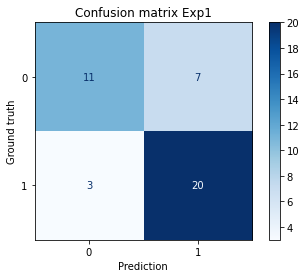

In [18]:
df_train = pd.read_csv('../data/csv_data/train.csv')
df_train = df_train.dropna()
X_train = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
X_train = pd.get_dummies(X_train, columns=['Sex'])
y_train = df_train['Survived']

df_test = pd.read_csv('../data/csv_data/test.csv')
df_test = df_test.dropna()
X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]
X_test = pd.get_dummies(X_test, columns=['Sex'])
y_test = df_test[['Survived']]

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred))
plot_cm(y_test, y_pred, title='Exp1')

## Experiment 2
### Using features ['Pclass', 'Sex', 'Age', 'Fare'], with upsample data

0.8444444444444444


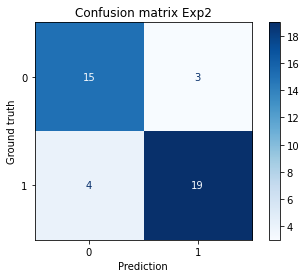

In [19]:
df_train = pd.read_csv('../data/csv_data/train_upsample.csv')
df_train = df_train.dropna()
X_train = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
X_train = pd.get_dummies(X_train, columns=['Sex'])
y_train = df_train['Survived']

df_test = pd.read_csv('../data/csv_data/test.csv')
df_test = df_test.dropna()
X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]
X_test = pd.get_dummies(X_test, columns=['Sex'])
y_test = df_test[['Survived']]

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred))
plot_cm(y_test, y_pred, title='Exp2')

## Experiment 3
### Using features ['Sex', 'Age'], with upsample data, and model hyper parameter tuning

0.888888888888889


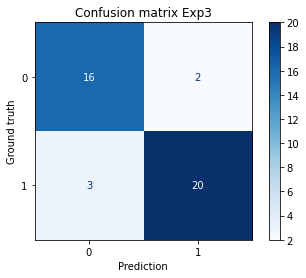

In [38]:
df_train = pd.read_csv('../data/csv_data/train_upsample.csv')
df_train = df_train.dropna()
X_train = df_train[['Sex', 'Age']]
X_train = pd.get_dummies(X_train, columns=['Sex'])
y_train = df_train['Survived']

df_test = pd.read_csv('../data/csv_data/test.csv')
df_test = df_test.dropna()
X_test = df_test[['Sex', 'Age']]
X_test = pd.get_dummies(X_test, columns=['Sex'])
y_test = df_test[['Survived']]

model = RandomForestClassifier(max_depth=6, min_samples_split=3, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred))
plot_cm(y_test, y_pred, title='Exp3')

## Other model

0.84


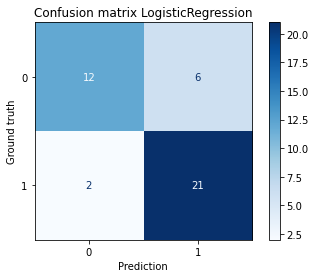

In [45]:
df_train = pd.read_csv('../data/csv_data/train_upsample.csv')
df_train = df_train.dropna()
X_train = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
X_train = pd.get_dummies(X_train, columns=['Sex'])
y_train = df_train['Survived']

df_test = pd.read_csv('../data/csv_data/test.csv')
df_test = df_test.dropna()
X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]
X_test = pd.get_dummies(X_test, columns=['Sex'])
y_test = df_test[['Survived']]

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred))
plot_cm(y_test, y_pred, title='LogisticRegression')